In [1]:
import numpy as np

from matplotlib import pyplot as plt
import random

Here we will demostrate the kmeans clustering technique

In [2]:
# Create synthetic data

C1 = np.random.normal(loc=[5,5], scale=[1,2], size=(50,2))
C2 = np.random.normal(loc=[-5,-5], scale=[2,1], size=(50,2))

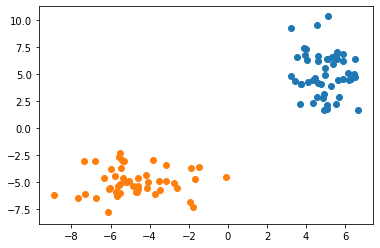

In [3]:
# Plot data

plt.scatter(C1[:,0], C1[:,1])
plt.scatter(C2[:,0], C2[:,1])

plt.show()

In [4]:
# Combine them into a single dataset and shuffle

data = np.vstack((C1, C2))
np.random.shuffle(data)

In [5]:
# Define our class

class K_Means:
    def __init__(self, n_clusters=2, tol=1E-7, max_iter=100):
        """
        Constructor for k-means clusterer
        :param clusters: (int) Number of clusters. Default: 2
        :param tol: (float) Convergence tolerence. Default: 1E-7
        :param max_iter: (int) Maximum fitting iterations. Default: 1E2
        """
        self.n_clusters, self.tol, self.max_iter = n_clusters, tol, max_iter
        self.centroids, self.labels, self.classifications = None, None, None
        

    def fit(self, data):
        """
        Fit the model
        :input data: (Array-like of floats) Data to cluster on  
        """

        # Randomly initialize the centroids
        
        
        self.centroids = np.array(random.sample(list(data), self.n_clusters))

        for i in range(self.max_iter):
            print('Iteration {}'.format(i+1), end='\r')

            self.clusters = []
            
            # initialize list
            for j in range(self.n_clusters):
                self.clusters.append([]) 
            
            # Label samples
            for sample in data:
                distances = [np.linalg.norm(sample-centroid) for centroid in self.centroids]
                cluster = np.argmin(distances)
                self.clusters[cluster].append(sample)

            # Save centroids for convergence testing
            prev_centroids = self.centroids
            
            # Update centroids
            self.centroids = np.array(random.sample(list(data), self.n_clusters))
            for j in range(len(self.clusters)):
                self.centroids[j] = np.average(self.clusters[j],axis=0)
                
            # If our biggest move is within tol we are done 
            if max(np.linalg.norm(self.centroids - prev_centroids, axis=1)) <  self.tol:
                print('Converged in {} iterations!'.format(i+1))
                return
        
        # If we get here we have not converged in max_iter
        print('Not converged')

    def predict(self, sample):
        """
        Assign clusters
        :param data: (Array-like)
        """
        distances = np.array([np.linalg.norm(sample-centroid, axis=1) for centroid in self.centroids])
        clusters = np.argmin(distances, axis=0)
        return clusters


In [6]:
clusterer = K_Means()

In [7]:
clusterer.fit(data)

Converged in 2 iterations!


That was quick! 

In [8]:
labels = clusterer.predict(data)

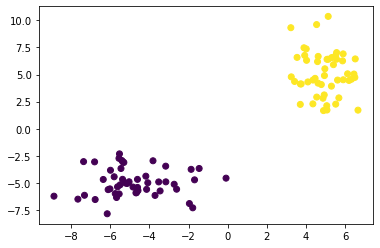

In [9]:
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [10]:
# TODO avoid using both np.random and random.

class K_Means:
    def __init__(self, n_clusters=2, tol=1E-7, max_iter=100, init='kmpp'):
        """
        Constructor for k-means clusterer
        :param clusters: (int) Number of clusters. Default: 2
        :param tol: (float) Convergence tolerence. Default: 1E-7
        :param max_iter: (int) Maximum fitting iterations. Default: 1E2
        """
        self.n_clusters, self.tol, self.max_iter, self.init = n_clusters, tol, max_iter, init
        self.centroids, self.labels, self.classifications = None, None, None
        

    def fit(self, data):
        """
        Fit the model
        :input data: (Array-like of floats) Data to cluster on  
        """

        if self.init == 'kmpp':
            # If using kmeans++, choose the first centroid randomly...
            self.centroids = [random.choice(list(data))]
            for i in range(self.n_clusters-1):
                # ... then ensure the other choices are well-spaced
                distances = np.amax(np.array([np.linalg.norm(data-centroid, axis=1) for centroid in self.centroids]), axis=0)
                idx = np.random.choice(len(data), p=distances**2/np.sum(distances**2))
                self.centroids.append(data[idx])
        else:   
            # Randomly initialize the centroids        
            self.centroids = np.array(random.sample(list(data), k=self.n_clusters))

        for i in range(self.max_iter):
            print('Iteration {}'.format(i+1), end='\r')

            self.clusters = []
            
            # initialize list
            for j in range(self.n_clusters):
                self.clusters.append([]) 
            
            # Label samples
            for sample in data:
                distances = [np.linalg.norm(sample-centroid) for centroid in self.centroids]
                cluster = np.argmin(distances)
                self.clusters[cluster].append(sample)

            # Save centroids for convergence testing
            prev_centroids = self.centroids
            
            # Update centroids
            self.centroids = np.array(random.sample(list(data), self.n_clusters))
            for j in range(len(self.clusters)):
                self.centroids[j] = np.average(self.clusters[j],axis=0)
                
            # If our biggest move is within tol we are done 
            if max(np.linalg.norm(self.centroids - prev_centroids, axis=1)) <  self.tol:
                print('Converged in {} iterations!'.format(i+1))
                return
        
        # If we get here we have not converged in max_iter
        print('Not converged')

    def predict(self, sample):
        """
        Assign clusters
        :param data: (Array-like)
        """
        distances = np.array([np.linalg.norm(sample-centroid, axis=1) for centroid in self.centroids])
        clusters = np.argmin(distances, axis=0)
        return clusters

In [11]:
clusterer = K_Means()

clusterer.fit(data)

Converged in 2 iterations!


Let's try a more difficult example

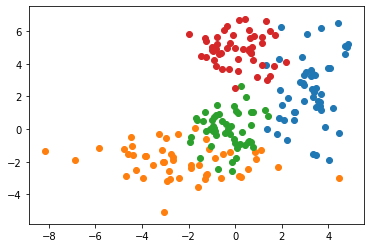

In [12]:
C1 = np.random.normal(loc=[3,3], scale=[1,2], size=(50,2))
C2 = np.random.normal(loc=[-2,-2], scale=[2,1], size=(50,2))
C3 = np.random.normal(loc=[-0,0], scale=[1,1], size=(50,2))
C4 = np.random.normal(loc=[0,5], scale=[1,1], size=(50,2))

# Plot data

plt.scatter(C1[:,0], C1[:,1])
plt.scatter(C2[:,0], C2[:,1])
plt.scatter(C3[:,0], C3[:,1])
plt.scatter(C4[:,0], C4[:,1])

plt.show()

In [13]:
# Combine them into a single class

data = np.vstack((C1, C2, C3, C4))
np.random.shuffle(data)

In [14]:
clusterer = K_Means(n_clusters=4, init=None)

clusterer.fit(data)

Converged in 6 iterations!


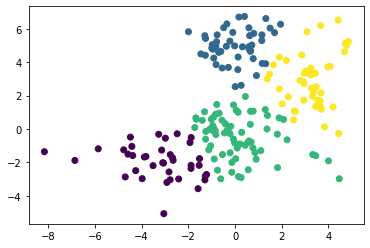

In [15]:
labels = clusterer.predict(data)

plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [16]:
clusterer = K_Means(n_clusters=4)

clusterer.fit(data)

Converged in 16 iterations!


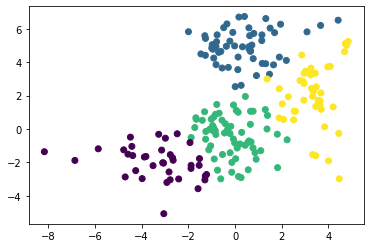

In [17]:
labels = clusterer.predict(data)

plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()